In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sb
sb.set_context("paper")
# sb.set(rc={'figure.figsize': (16, 9.)})
sb.set(rc={'figure.figsize': (12, 6.)})
sb.set_style("whitegrid")

In [ ]:
import PIL
img = PIL.Image.open("AD2-Map.png")
_plt.imshow(img, zorder=-100, extent=[ _mapbounds['minlon'],_mapbounds['maxlon'],_mapbounds['minlat'],_mapbounds['maxlat'] ])
print(img)


	looking in: /Users/sinan/Dropbox (WorkDropbox)/SustainableLogistics/Analysis and Experiments/Code/mcta/
	reading configurations and rules from mcta_vis_cfg.json file...
	reading AD2-Map.json
	reading AD2-Map.geojson
	numer of GA genes should be: 184.0
		Msg: success
		D_max = 40.87141124341272
		KemenyConst = (1293.0969412149716+8.271161533457416e-15j)
	saving memdump to AD2-Results.json


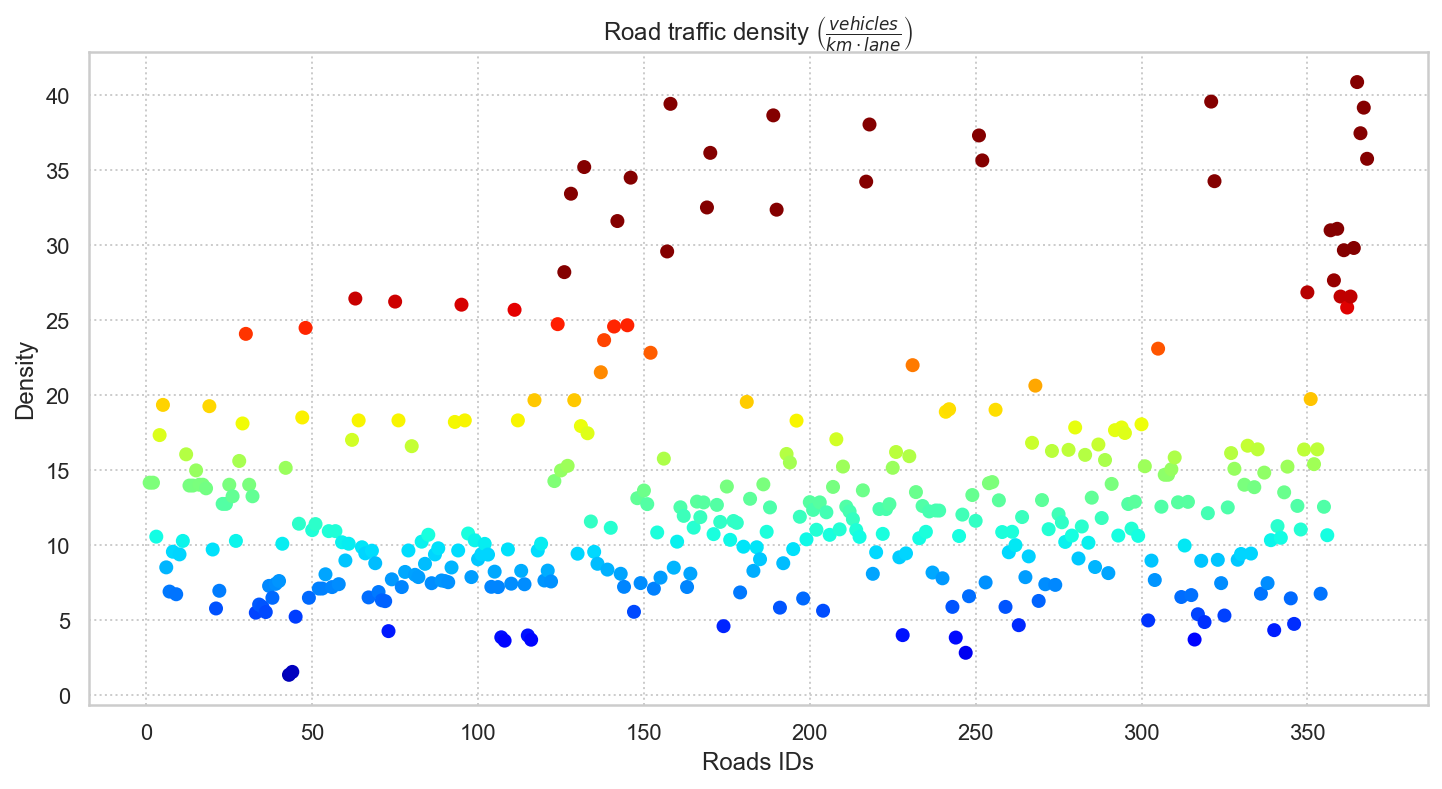

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1167x860 at 0x1A1FA45DA0>


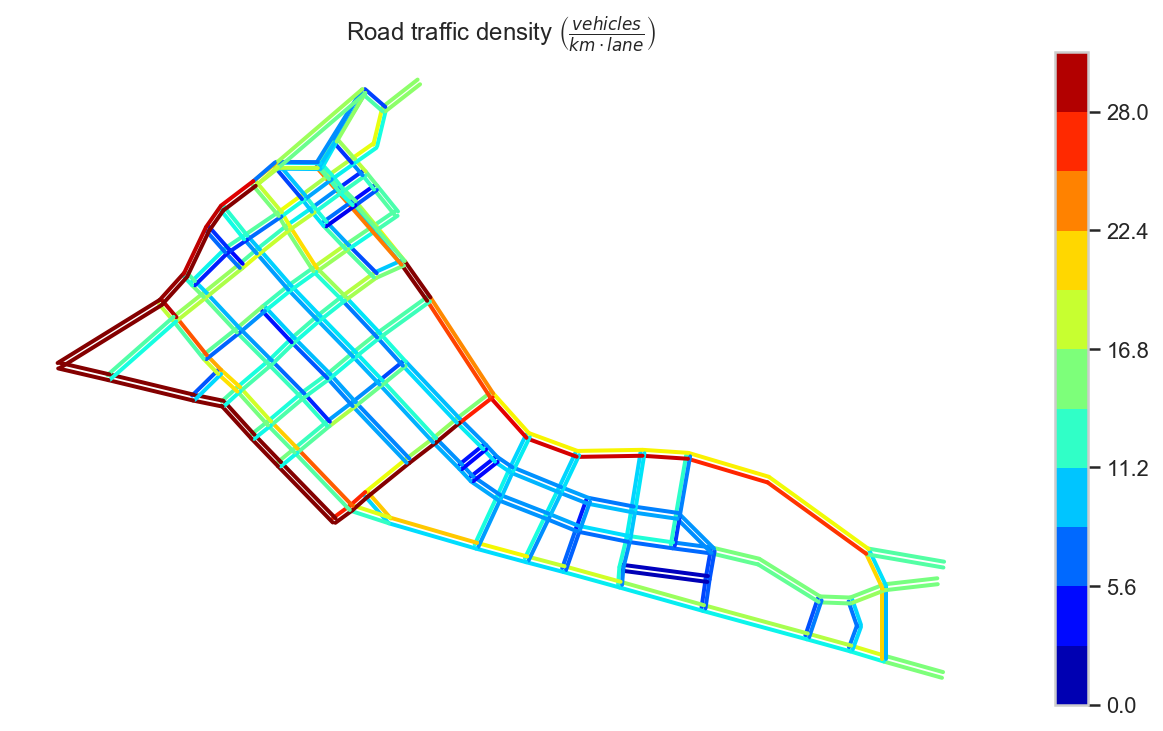

attempting to plot EmissionCost...


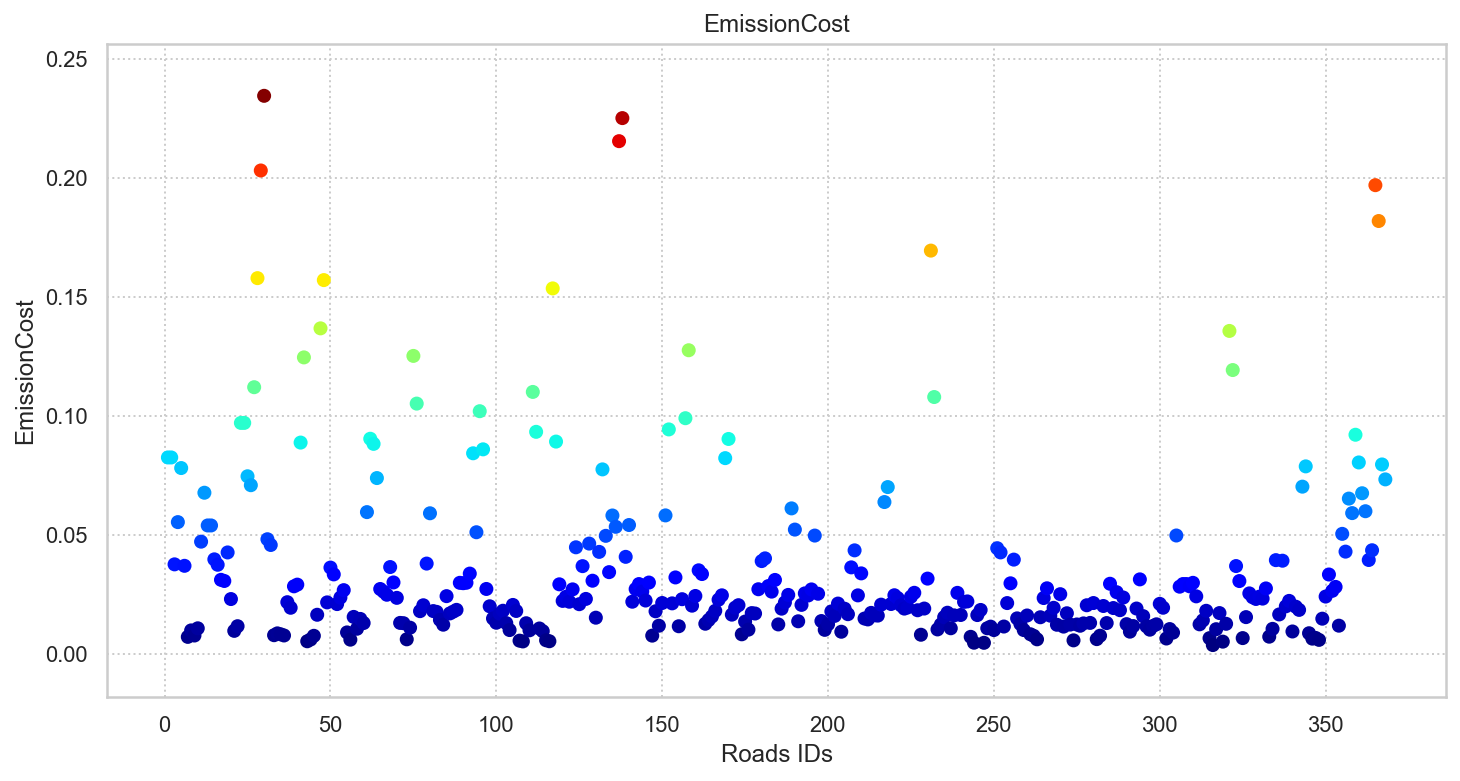

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1167x860 at 0x10C8313C8>


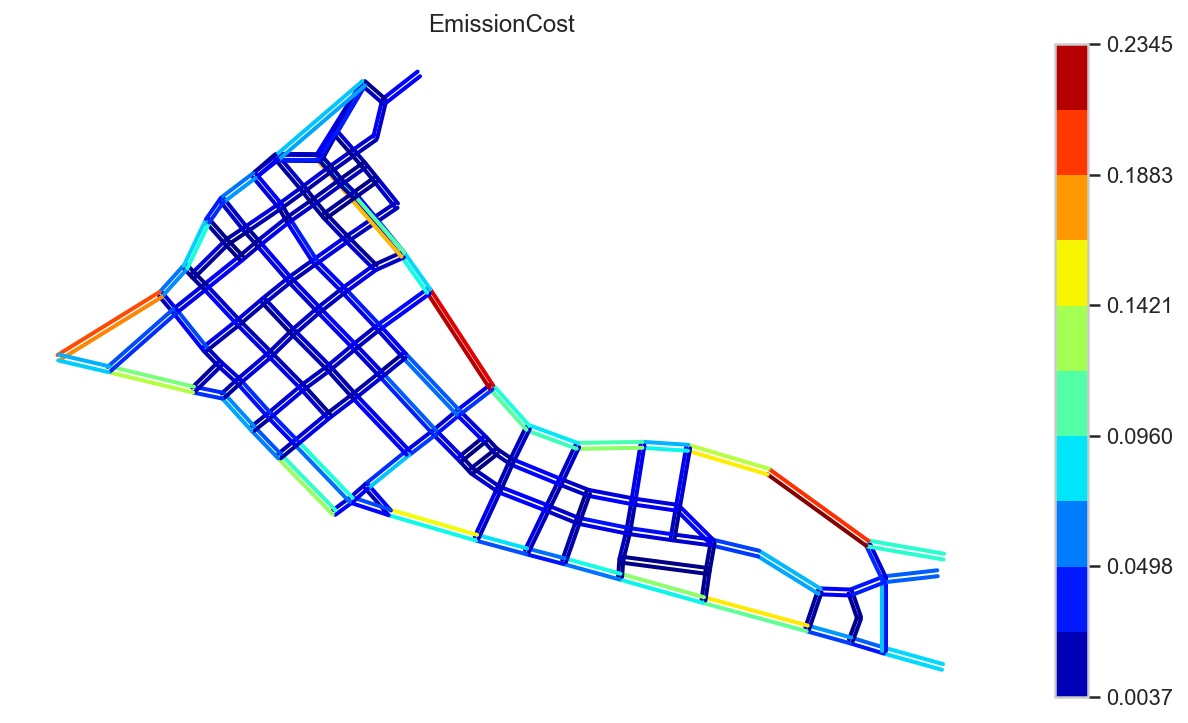

In [4]:
import mcta
import mcta_vis
import mcta_rw
import mcta_edit

base = 'AD2'
verbose = False
(Settings, JSON_Map, GeoJSON_Map) = mcta_rw.LoadDataFiles(base)
lengths, lanes, FFS, P = mcta.SetupMCTA(JSON_Map, GeoJSON_Map, Verbose=verbose)
print(f'\tnumer of GA genes should be: {lanes.shape[0]/2}')
Results = mcta.SolveMCTA(lengths=lengths, lanes=lanes, P=P, 
                         VehiclesCount=JSON_Map['VehiclesCountEst'], 
                         Objectives=['D','K','E'], 
                         FreeFlowSpeeds=FFS, SkipChecksForSpeed=True)
print(f'\t\tMsg: {Results["Message"]}')
print(f'\t\tD_max = {max(Results["Density"])}')
print(f'\t\tKemenyConst = {Results["KemenyConst"]}')
# print(f'\t\tEM(CO)_max = {max(Results["Emission"])}')
# print(f'\t\tTot.EM(CO) = {Results["TotalNetworkEmission"]}')
mcta_rw.SaveResults(Results)
mcta_vis.Initialize(JSON_Map,Settings,base,ShowFigs=True, SaveFigs2PNG=False)
mcta_vis.Generate_Figure(Results,'Density',Limit=28)
mcta_vis.Generate_Figure(Results,'EmissionCost')
# for x in Results.keys():
#     mcta_vis.Generate_Figure(Results,x)

	looking in: /Users/sinan/Dropbox (WorkDropbox)/SustainableLogistics/Analysis and Experiments/Code/mcta/
	reading configurations and rules from mcta_vis_cfg.json file...
	reading AD2-Map.json
	reading AD2-Map.geojson
	the following links direction are reversed: 


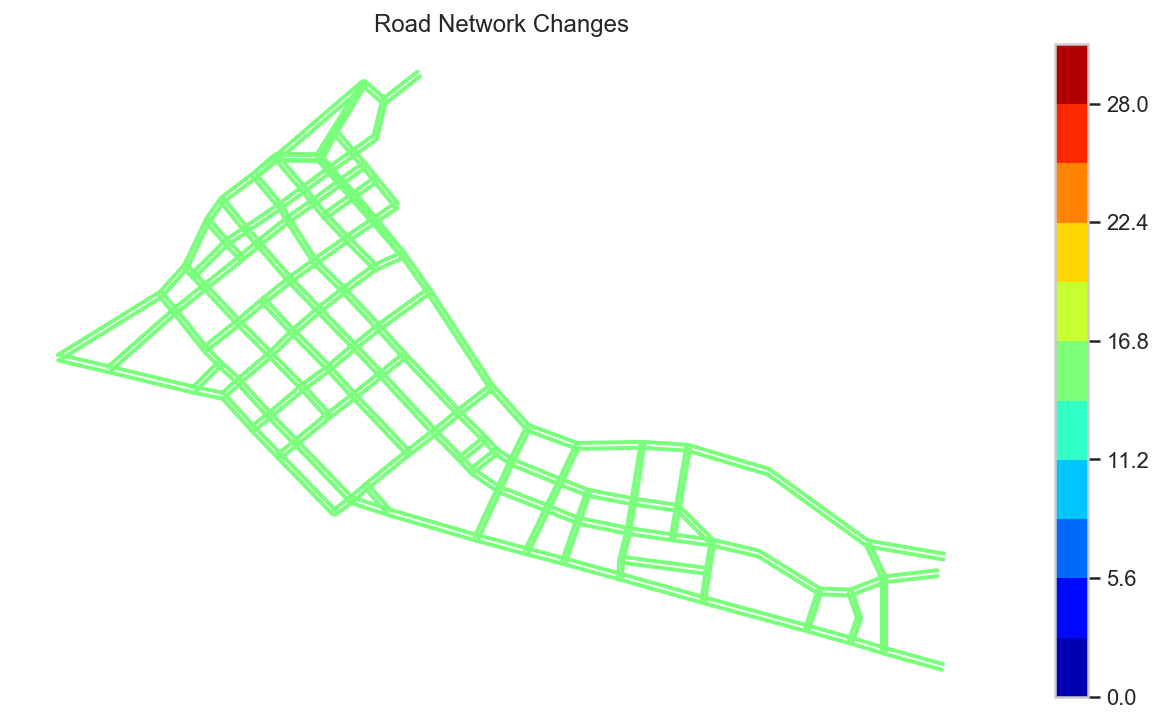

 		Msg: success
		Changes:0
		D_max = 40.871411243412545
		KemenyConst = (1293.0969412149702+1.0824674490095276e-14j)
		EM($)_max = 0.2344744051292822
		Tot.EM($) = 312.27559257919063
	saving memdump to AD2-Results.json
Unrecognized result Speeds. it will not be included in the saved results.
Unrecognized result EmissionCost. it will not be included in the saved results.
Unrecognized result TotalNetworkEmissionCost. it will not be included in the saved results.


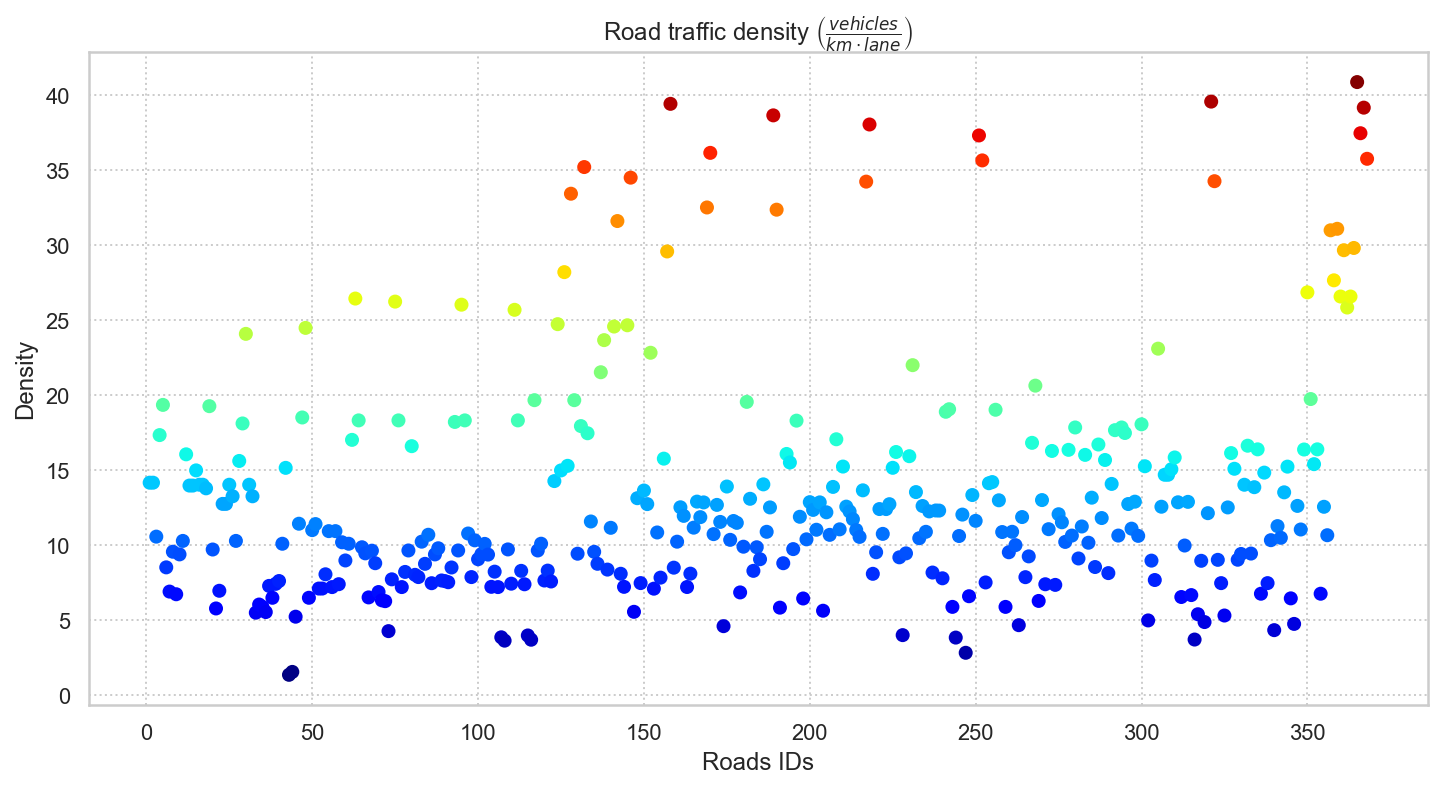

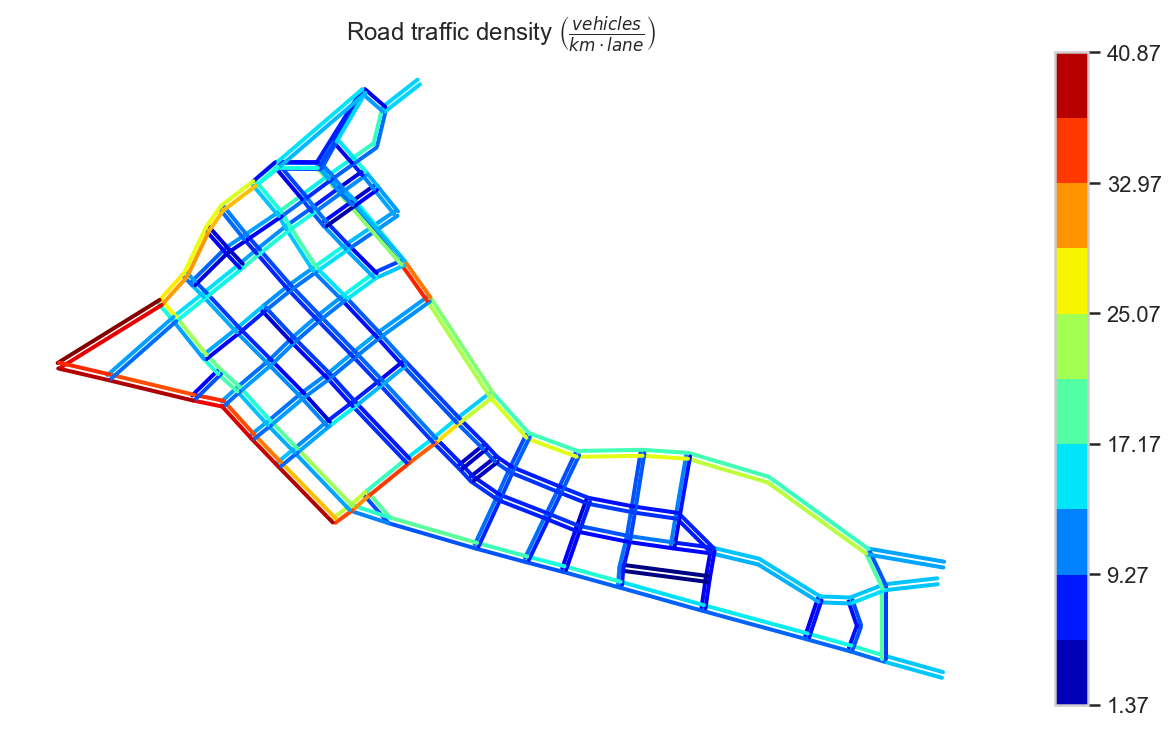

attempting to plot EmissionCost...


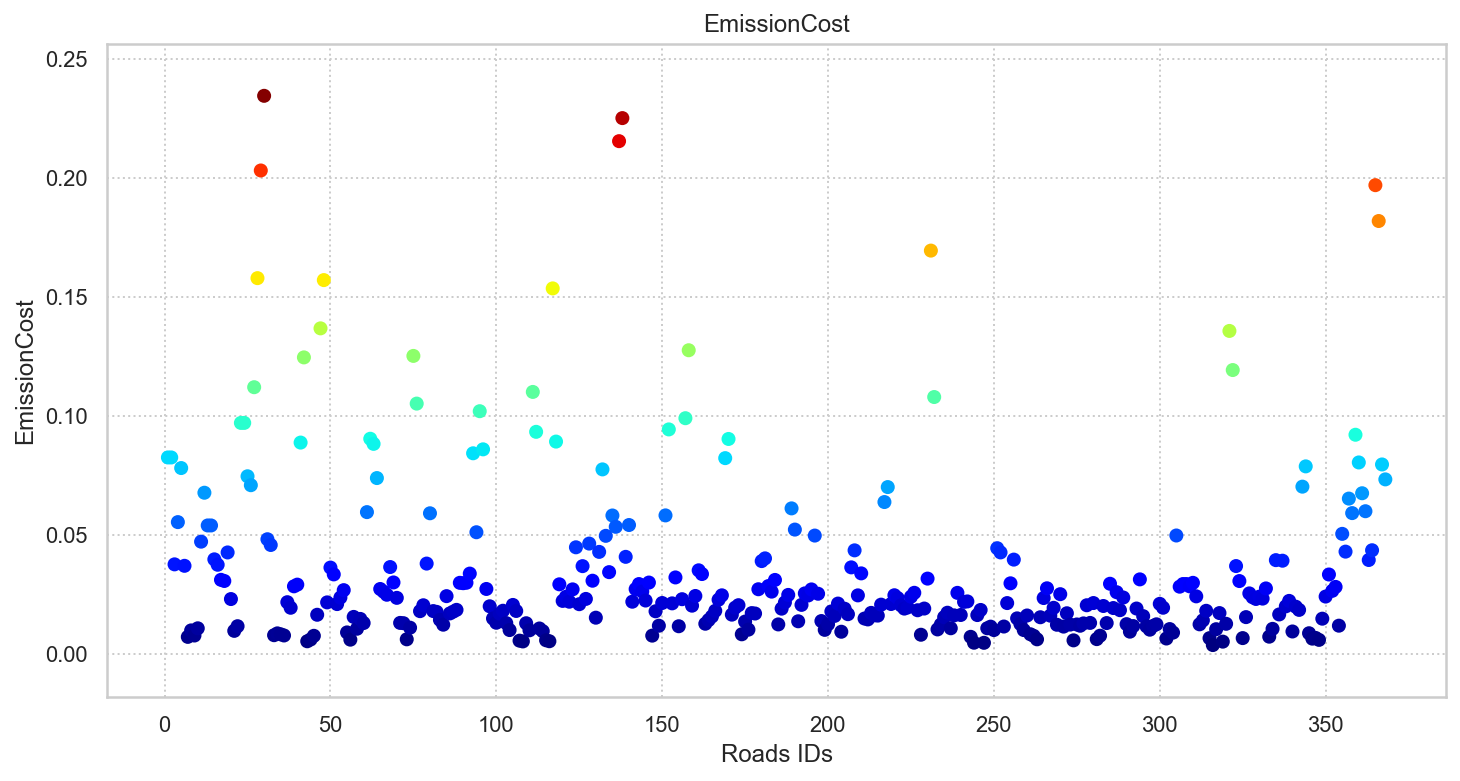

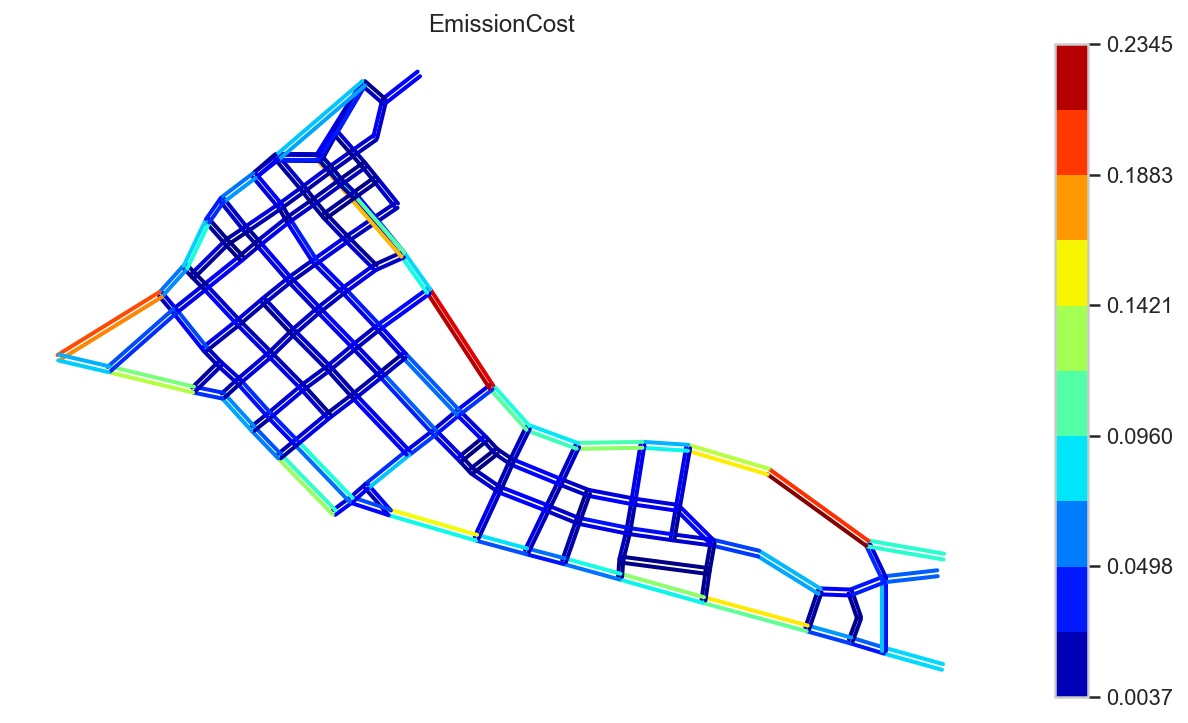

	the following links direction are reversed: 34, 39, 44, 52, 69, 82, 96, 99, 103, 107, 109, 121, 154, 159, 174, 186, 199, 219, 240, 263, 300, 325, 334, 340, 


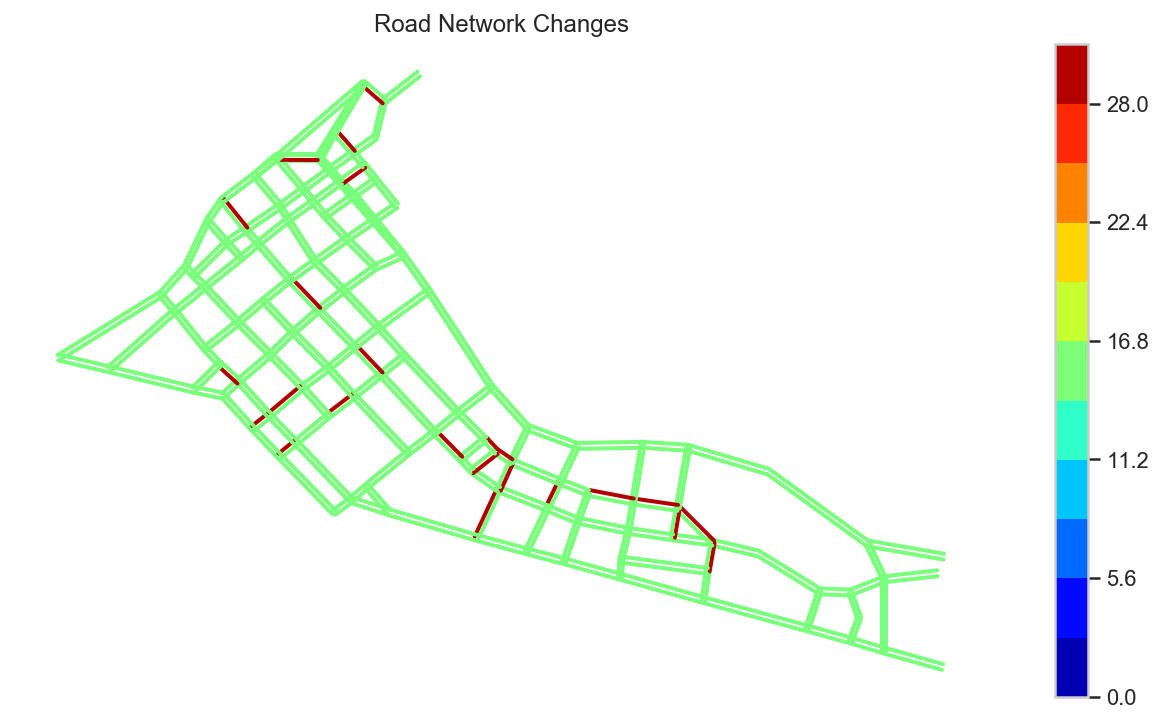

 		Msg: success
		Changes:24
		D_max = 6599.401891073122
		KemenyConst = (2453.316114651508+9.325873406851315e-15j)
		EM($)_max = 227.876536987556
		Tot.EM($) = 56.969134246889006
	saving memdump to AD2-Results.json
Unrecognized result Speeds. it will not be included in the saved results.
Unrecognized result EmissionCost. it will not be included in the saved results.
Unrecognized result TotalNetworkEmissionCost. it will not be included in the saved results.


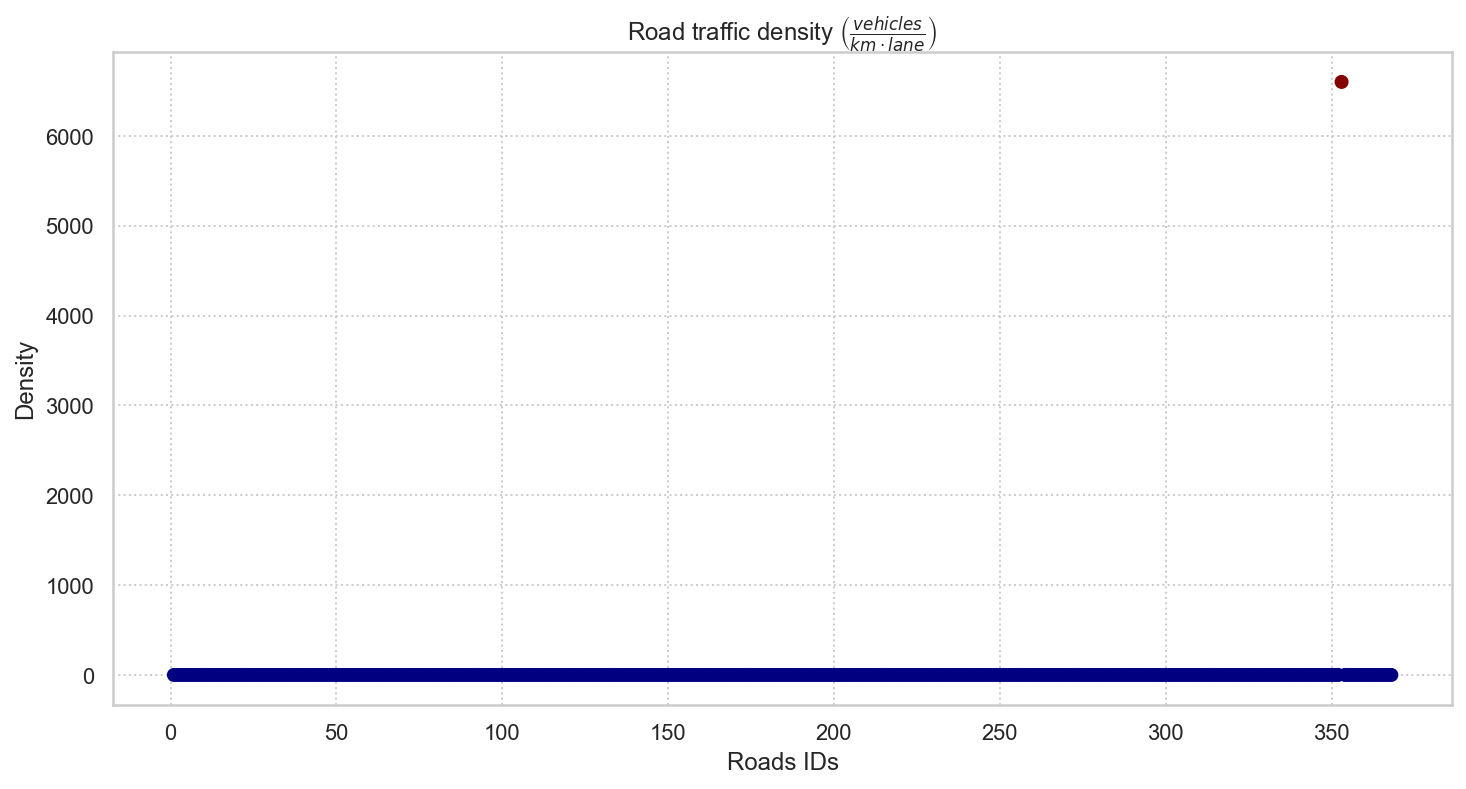

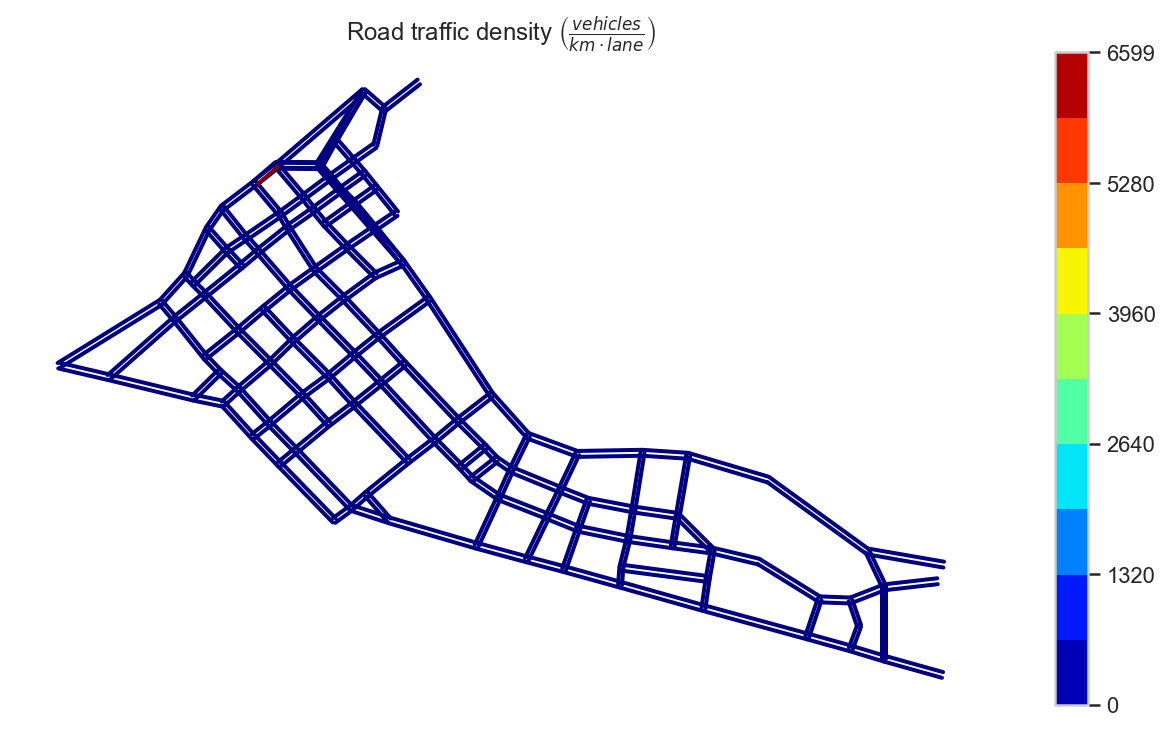

attempting to plot EmissionCost...


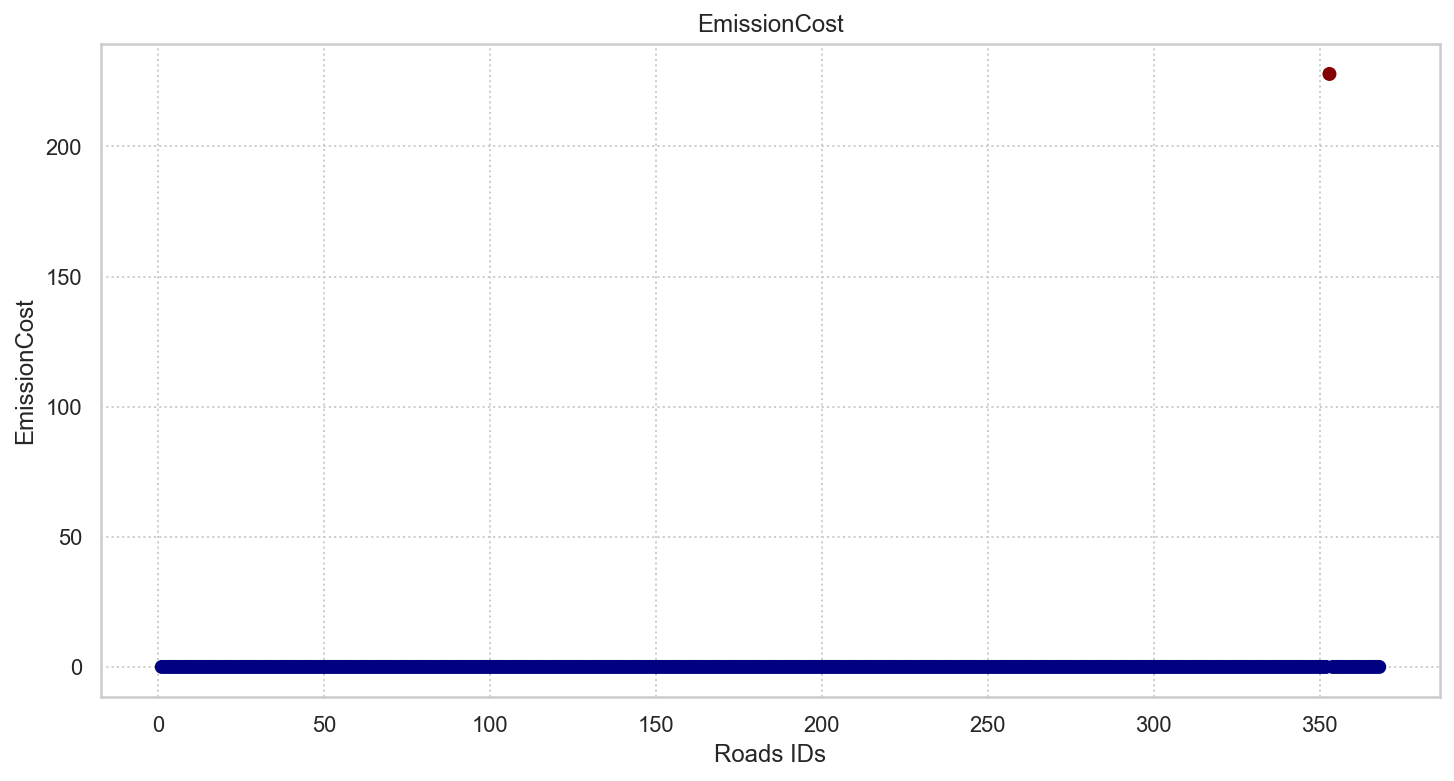

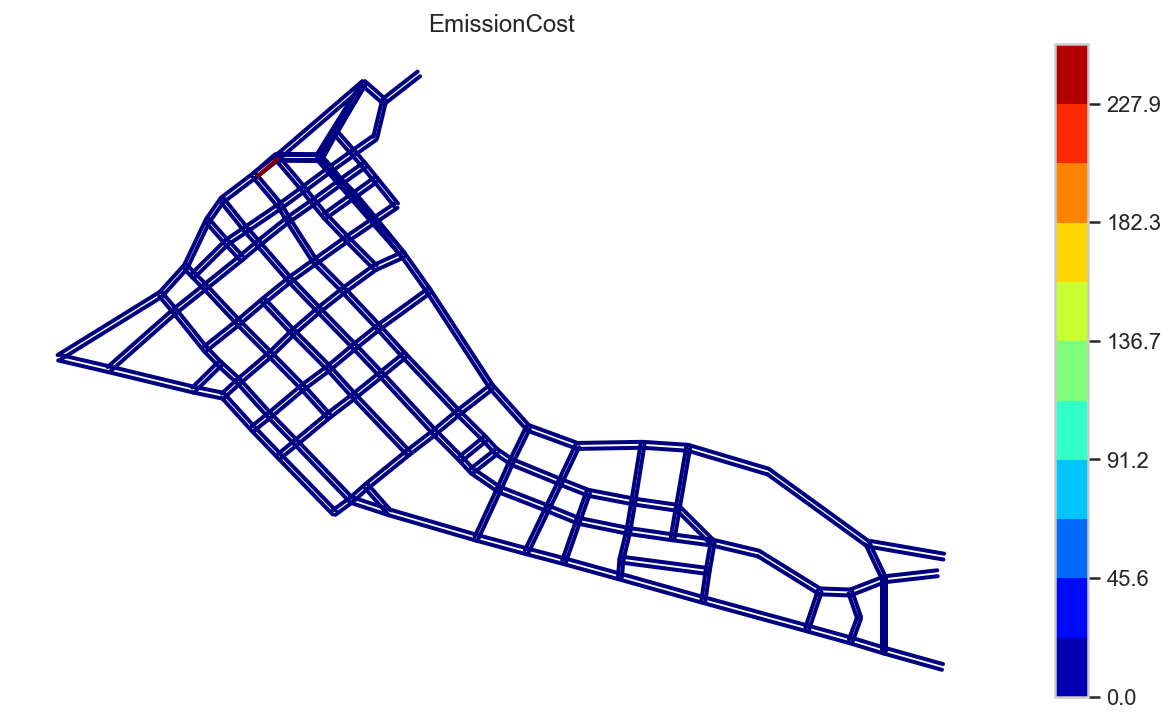

         31382 function calls (31373 primitive calls) in 0.129 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.065    0.065    0.066    0.066 decomp.py:118(eig)
       10    0.007    0.001    0.007    0.001 {built-in method numpy.dot}
      343    0.004    0.000    0.004    0.000 _bsplines.py:357(_evaluate)
     1689    0.004    0.000    0.004    0.000 {built-in method numpy.array}
        6    0.003    0.001    0.005    0.001 csr.py:145(tolil)
      343    0.003    0.000    0.005    0.000 interpolate.py:672(_check_bounds)
     2136    0.003    0.000    0.003    0.000 defmatrix.py:191(__getitem__)
        1    0.002    0.002    0.023    0.023 emissions.py:222(<listcomp>)
      343    0.002    0.000    0.016    0.000 interpolate.py:657(_evaluate)
        1    0.002    0.002    0.127    0.127 mcta_edit.py:88(ModifyNetworkAndSolveMC)
      709    0.002    0.000    0.002    0.000 {method 'reduce' of 'numpy.ufunc'

In [6]:
import mcta
import mcta_vis
import mcta_rw
import mcta_edit

base = 'AD2'
verbose = False

if base == 'Ex':
    LinkEdits = [
                 [0,0,0,0,0,0,0,0], # reverse none
                 [0,0,0,1,0,0,0,0], # reverse 6
                 [0,0,0,1,2,0,0,0] # reverse 6 & 9
                ]
else:
    LinkEdits = [
                # original network
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                # example solution
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                ]

(Settings, JSON_Map, GeoJSON_Map) = mcta_rw.LoadDataFiles(base)
_, _, _, P = mcta.SetupMCTA(JSON_Map, GeoJSON_Map, Verbose=verbose)
mcta_vis.Initialize(JSON_Map,Settings,base,ShowFigs=True, SaveFigs2PNG=False)

for LE in LinkEdits:
    print('\t' + mcta_edit.ExplainModification(LE))
    mcta_vis.ShowModificationOnMap(LE)
    if LE[3] == 1 and base == 'AD':
        P = mcta_edit.CloseCrisisRoads(P,[62,63])

    %prun Results = mcta_edit.ModifyNetworkAndSolveMC(P, LE, JSON_Map['VehiclesCountEst'], SkipChecksForSpeed = True)
    print(f'\t\tMsg: {Results["Message"]}')
    print(f'\t\tChanges:{len([x for x in LE if x>0])}')
    print(f'\t\tD_max = {max(Results["Density"])}')
    print(f'\t\tKemenyConst = {Results["KemenyConst"]}')
    print(f'\t\tEM($)_max = {max(Results["EmissionCost"])}')
    print(f'\t\tTot.EM($) = {Results["TotalNetworkEmissionCost"]}')

    mcta_rw.SaveResults(Results)
    mcta_vis.Generate_Figure(Results,'Density')
    mcta_vis.Generate_Figure(Results,'EmissionCost')
#     for x in Results.keys():
#         mcta_vis.Generate_Figure(Results,x)